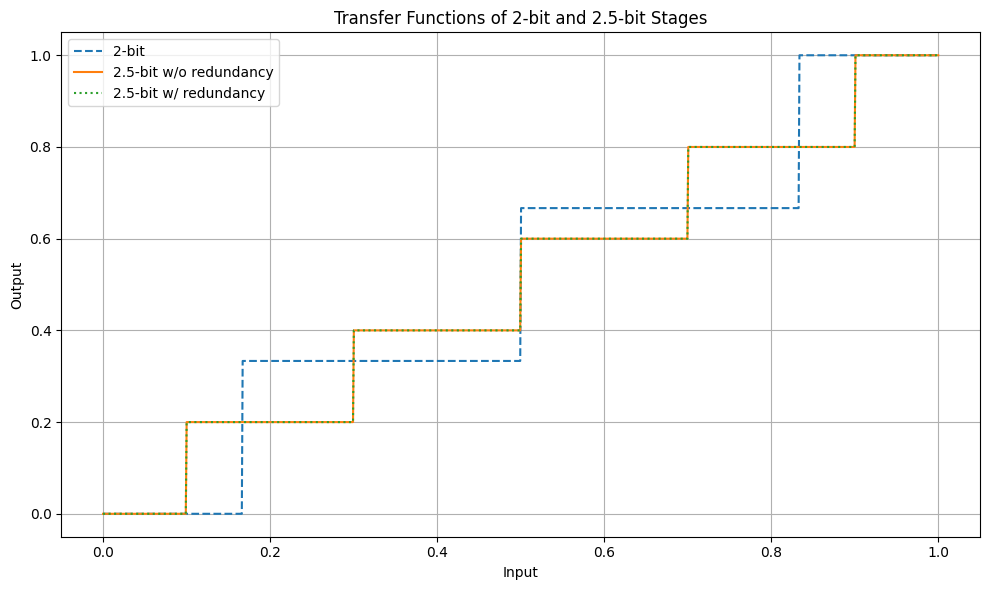

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define input range
x = np.linspace(0, 1, 1000)

# Define transfer functions
# Plain 2-bit transfer function (4 levels)
y_2b = np.round(x * 3) / 3

# 2.5-bit stage without redundancy (6 levels)
y_2_5b_no_red = np.round(x * 5) / 5

# 2.5-bit stage with redundancy (e.g., overrange or overlapping segments)
# This is an approximation with overlapping ranges
# We simulate some redundancy by repeating edge codes
y_2_5b_red = np.piecewise(x,
                          [x < 0.1, (x >= 0.1) & (x < 0.3), (x >= 0.3) & (x < 0.5),
                           (x >= 0.5) & (x < 0.7), (x >= 0.7) & (x < 0.9), x >= 0.9],
                          [0, 0.2, 0.4, 0.6, 0.8, 1])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y_2b, label='2-bit', linestyle='--')
plt.plot(x, y_2_5b_no_red, label='2.5-bit w/o redundancy')
plt.plot(x, y_2_5b_red, label='2.5-bit w/ redundancy', linestyle=':')

plt.title("Transfer Functions of 2-bit and 2.5-bit Stages")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


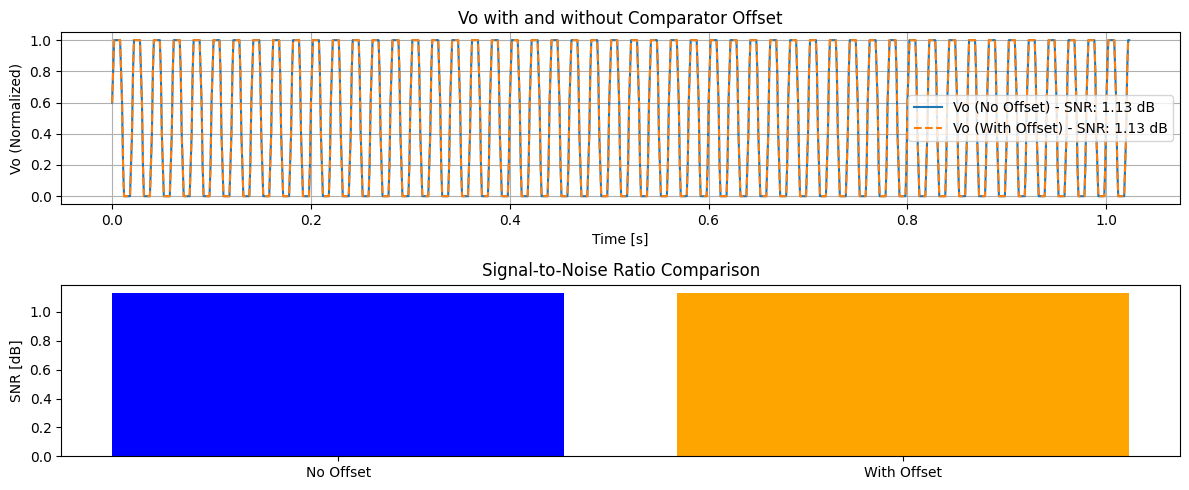

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Parameters
fs = 1000  # Sampling frequency in Hz
f_tone = 50  # Tone frequency in Hz
N = 1024  # Number of samples
t = np.arange(N) / fs  # Time vector
V_R = 1.0  # Reference voltage
offset = V_R / 8  # Comparator offset

# Generate test tone input signal
x_tone = 0.9 * V_R * np.sin(2 * np.pi * f_tone * t)

# Quantizer function simulating 2.5-bit stage (6 levels)
def quantize_2_5b(signal, with_offset=False):
    levels = 6
    if with_offset:
        thresholds = np.linspace(-V_R/2 + offset, V_R/2 - offset, levels - 1)
    else:
        thresholds = np.linspace(-V_R/2, V_R/2, levels - 1)
    quant_levels = np.linspace(-V_R/2, V_R/2, levels)
    return np.digitize(signal, thresholds) / (levels - 1)

# Quantized outputs
vo_no_offset = quantize_2_5b(x_tone, with_offset=False)
vo_with_offset = quantize_2_5b(x_tone, with_offset=True)

# Function to calculate SNR
def calculate_snr(signal):
    signal_fft = np.abs(fft(signal))**2
    signal_power = np.max(signal_fft)
    noise_power = np.sum(signal_fft) - signal_power
    return 10 * np.log10(signal_power / noise_power)

snr_no_offset = calculate_snr(vo_no_offset)
snr_with_offset = calculate_snr(vo_with_offset)

# Plot Vo
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(t, vo_no_offset, label=f'Vo (No Offset) - SNR: {snr_no_offset:.2f} dB')
plt.plot(t, vo_with_offset, label=f'Vo (With Offset) - SNR: {snr_with_offset:.2f} dB', linestyle='--')
plt.title("Vo with and without Comparator Offset")
plt.xlabel("Time [s]")
plt.ylabel("Vo (Normalized)")
plt.grid(True)
plt.legend()

# Plot SNR bar chart
plt.subplot(2, 1, 2)
plt.bar(['No Offset', 'With Offset'], [snr_no_offset, snr_with_offset], color=['blue', 'orange'])
plt.ylabel("SNR [dB]")
plt.title("Signal-to-Noise Ratio Comparison")

plt.tight_layout()
plt.show()
